In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv("C:/Users/harsh/Downloads/all_exoplanets_2021.csv")

In [121]:
df.head(5)

,No.,Planet Name,Planet Host,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days,Orbit Semi-Major Axis,...,Equilibrium Temperature,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Stellar Metallicity,Stellar Metallicity Ratio,Stellar Surface Gravity,Distance,Gaia Magnitude
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03000,1.29,...,NaN,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,93.1846,4.44038
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,1.53,...,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,125.3210,4.56216
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000,0.83,...,NaN,K0 III,4813.0,11.00,2.20,-0.24,[Fe/H],2.63,75.4392,4.91781
3,4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,1773.40002,2.93,...,NaN,NaN,5338.0,0.93,0.90,0.41,[Fe/H],4.45,17.9323,6.38300
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.50000,1.66,...,NaN,NaN,5750.0,1.13,1.08,0.06,[Fe/H],4.36,21.1397,6.06428


In [122]:
for column_name, dtype in df.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")

Column 'No.' has data type: int64
Column 'Planet Name' has data type: object
Column 'Planet Host' has data type: object
Column 'Num Stars' has data type: int64
Column 'Num Planets' has data type: int64
Column 'Discovery Method' has data type: object
Column 'Discovery Year' has data type: int64
Column 'Discovery Facility' has data type: object
Column 'Orbital Period Days' has data type: float64
Column 'Orbit Semi-Major Axis' has data type: float64
Column 'Mass' has data type: float64
Column 'Eccentricity' has data type: float64
Column 'Insolation Flux' has data type: float64
Column 'Equilibrium Temperature' has data type: float64
Column 'Spectral Type' has data type: object
Column 'Stellar Effective Temperature' has data type: float64
Column 'Stellar Radius' has data type: float64
Column 'Stellar Mass' has data type: float64
Column 'Stellar Metallicity' has data type: float64
Column 'Stellar Metallicity Ratio' has data type: object
Column 'Stellar Surface Gravity' has data type: float64

In [123]:
def is_potentially_habitable(exoplanet):
    # Rule 1: Orbital Period and Semi-Major Axis
    if 100 < exoplanet['Orbital Period Days'] < 400:
        if 0.5 < exoplanet['Orbit Semi-Major Axis'] < 2.0:
            # Rule 2: Equilibrium Temperature
            if -50 < exoplanet['Equilibrium Temperature'] < 50:
                # Rule 3: Stellar Parameters
                if 4000 < exoplanet['Stellar Effective Temperature'] < 6000:
                    if 0.5 < exoplanet['Stellar Radius'] < 2.0:
                        if 0.5 < exoplanet['Stellar Mass'] < 2.0:
                            # Rule 4: Eccentricity
                            if 0 < exoplanet['Eccentricity'] < 0.2:
                                return True
    return False

In [124]:
# Assuming df is your DataFrame containing exoplanet data
df['Potentially Habitable'] = df.apply(is_potentially_habitable, axis=1)

In [125]:
print(len(df))

4575


In [126]:
df['Potentially Habitable'].value_counts()

Potentially Habitable
False    4575
Name: count, dtype: int64

In [127]:
# Define the number of rows
num_rows = 4575

# Define ranges for each parameter based on habitable zone criteria
habitability_ranges = {
    'Orbital Period Days': (100, 400),
    'Orbit Semi-Major Axis': (0.5, 2.0),
    'Equilibrium Temperature': (-50, 50),
    'Stellar Effective Temperature': (4000, 6000),
    'Stellar Radius': (0.5, 2.0),
    'Stellar Mass': (0.5, 2.0),
    'Eccentricity': (0, 0.2)
}

# Generate random data within habitable zone ranges
random_data = {}
for column, (min_val, max_val) in habitability_ranges.items():
    random_data[column] = np.random.uniform(min_val, max_val, size=num_rows)

# Create DataFrame from random data
df_random = pd.DataFrame(random_data)

In [128]:
print(df_random.head())

   Orbital Period Days  Orbit Semi-Major Axis  Equilibrium Temperature  \
0           134.815081               0.569222               -22.471528   
1           196.441853               0.854189                -1.549837   
2           241.971525               1.823968               -49.041518   
3           247.854446               1.931026               -30.658315   
4           211.090897               1.025770                49.563931   

   Stellar Effective Temperature  Stellar Radius  Stellar Mass  Eccentricity  
0                    4717.017759        1.306926      1.325189      0.196153  
1                    5507.136055        0.599183      1.211361      0.070565  
2                    4520.190349        0.941506      1.548354      0.160173  
3                    4000.893933        1.602992      1.111933      0.086334  
4                    5145.756280        0.814688      0.939312      0.174988  


In [129]:
for column_name, dtype in df_random.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")

Column 'Orbital Period Days' has data type: float64
Column 'Orbit Semi-Major Axis' has data type: float64
Column 'Equilibrium Temperature' has data type: float64
Column 'Stellar Effective Temperature' has data type: float64
Column 'Stellar Radius' has data type: float64
Column 'Stellar Mass' has data type: float64
Column 'Eccentricity' has data type: float64


In [130]:
# Columns to append from df1 to df2
columns_to_append = ['No.', 'Planet Name', 'Planet Host', 'Num Stars', 'Num Planets', 'Discovery Method', 'Discovery Year', 'Discovery Facility',
                     'Mass', 'Insolation Flux', 'Spectral Type', 'Stellar Metallicity', 'Stellar Metallicity Ratio', 'Stellar Surface Gravity', 'Distance', 'Gaia Magnitude']

# Create a new DataFrame containing only the selected columns from df1
df1_selected = df[columns_to_append]

# Concatenate df2 and df1_selected along the rows (axis=0)
df_concatenated = pd.concat([df_random, df1_selected], ignore_index=True)

In [131]:
print(len(df_concatenated))

9150


In [132]:
df_concatenated['Potentially Habitable'] = df_concatenated.apply(is_potentially_habitable, axis=1)

In [133]:
df_concatenated['Potentially Habitable'].value_counts()

Potentially Habitable
True     4575
False    4575
Name: count, dtype: int64

In [134]:
# Convert True and False to 1 and 0, respectively, in a specific column
df_concatenated['Potentially Habitable'] = df_concatenated['Potentially Habitable'].astype(int)

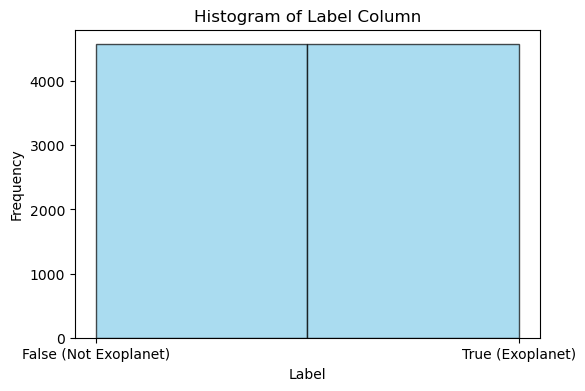

In [135]:
# Assuming your DataFrame is named df
plt.figure(figsize=(6, 4))
plt.hist(df_concatenated['Potentially Habitable'], bins=[0,0.5, 1], color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Column')

# Customize x-axis ticks and labels
plt.xticks([0, 1], ['False (Not Exoplanet)', 'True (Exoplanet)'])

# Show plot
plt.show()

In [136]:
df_concatenated.head()

,Orbital Period Days,Orbit Semi-Major Axis,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Eccentricity,No.,Planet Name,Planet Host,...,Discovery Facility,Mass,Insolation Flux,Spectral Type,Stellar Metallicity,Stellar Metallicity Ratio,Stellar Surface Gravity,Distance,Gaia Magnitude,Potentially Habitable
0,134.815081,0.569222,-22.471528,4717.017759,1.306926,1.325189,0.196153,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,196.441853,0.854189,-1.549837,5507.136055,0.599183,1.211361,0.070565,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,241.971525,1.823968,-49.041518,4520.190349,0.941506,1.548354,0.160173,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,247.854446,1.931026,-30.658315,4000.893933,1.602992,1.111933,0.086334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,211.090897,1.025770,49.563931,5145.756280,0.814688,0.939312,0.174988,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [137]:
for column_name, dtype in df_concatenated.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")

Column 'Orbital Period Days' has data type: float64
Column 'Orbit Semi-Major Axis' has data type: float64
Column 'Equilibrium Temperature' has data type: float64
Column 'Stellar Effective Temperature' has data type: float64
Column 'Stellar Radius' has data type: float64
Column 'Stellar Mass' has data type: float64
Column 'Eccentricity' has data type: float64
Column 'No.' has data type: float64
Column 'Planet Name' has data type: object
Column 'Planet Host' has data type: object
Column 'Num Stars' has data type: float64
Column 'Num Planets' has data type: float64
Column 'Discovery Method' has data type: object
Column 'Discovery Year' has data type: float64
Column 'Discovery Facility' has data type: object
Column 'Mass' has data type: float64
Column 'Insolation Flux' has data type: float64
Column 'Spectral Type' has data type: object
Column 'Stellar Metallicity' has data type: float64
Column 'Stellar Metallicity Ratio' has data type: object
Column 'Stellar Surface Gravity' has data type:

In [138]:
columns_to_remove = ['No.', 'Planet Name', 'Planet Host','Num Stars','Num Planets','Mass', 'Discovery Method',
                     'Discovery Year', 'Discovery Facility','Insolation Flux','Spectral Type','Stellar Metallicity','Stellar Metallicity Ratio',
                    'Distance','Gaia Magnitude']

# Remove the specified columns
df_cleaned = df_concatenated.drop(columns=columns_to_remove)

In [139]:
for column_name, dtype in df_cleaned.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")

Column 'Orbital Period Days' has data type: float64
Column 'Orbit Semi-Major Axis' has data type: float64
Column 'Equilibrium Temperature' has data type: float64
Column 'Stellar Effective Temperature' has data type: float64
Column 'Stellar Radius' has data type: float64
Column 'Stellar Mass' has data type: float64
Column 'Eccentricity' has data type: float64
Column 'Stellar Surface Gravity' has data type: float64
Column 'Potentially Habitable' has data type: int32


In [140]:
# # Get dummy variables for categorical columns
# df_encoded = pd.get_dummies(df_cleaned, columns=['Spectral Type', 'Stellar Metallicity Ratio'])

# df_cleanedwithoutnan = df_encoded.dropna()

In [141]:
# print(len(df_encoded))

In [142]:
from sklearn.model_selection import train_test_split
y_col = 'Potentially Habitable'
#y_col = 'hours'
feature_cols = [x for x in df_cleaned.columns if x!=y_col]
print(feature_cols)
X_data = df_cleaned[feature_cols]
y_data = df_cleaned[y_col]
#X_data = df_norm[['LINE_ID', 'FACILITY_CODE', 'CON_SIZE', 'STATUS', 'CARGO_TYPE']]
#X_data = df_norm[['FACILITY_CODE', 'CON_SIZE', 'STATUS', 'CARGO_TYPE']]
# X_data = clean_df.iloc[:,1:98]
#y_data = df_norm[y_col]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(len(X_train))

['Orbital Period Days', 'Orbit Semi-Major Axis', 'Equilibrium Temperature', 'Stellar Effective Temperature', 'Stellar Radius', 'Stellar Mass', 'Eccentricity', 'Stellar Surface Gravity']
(7320, 8) (1830, 8) (7320,) (1830,)
7320


C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


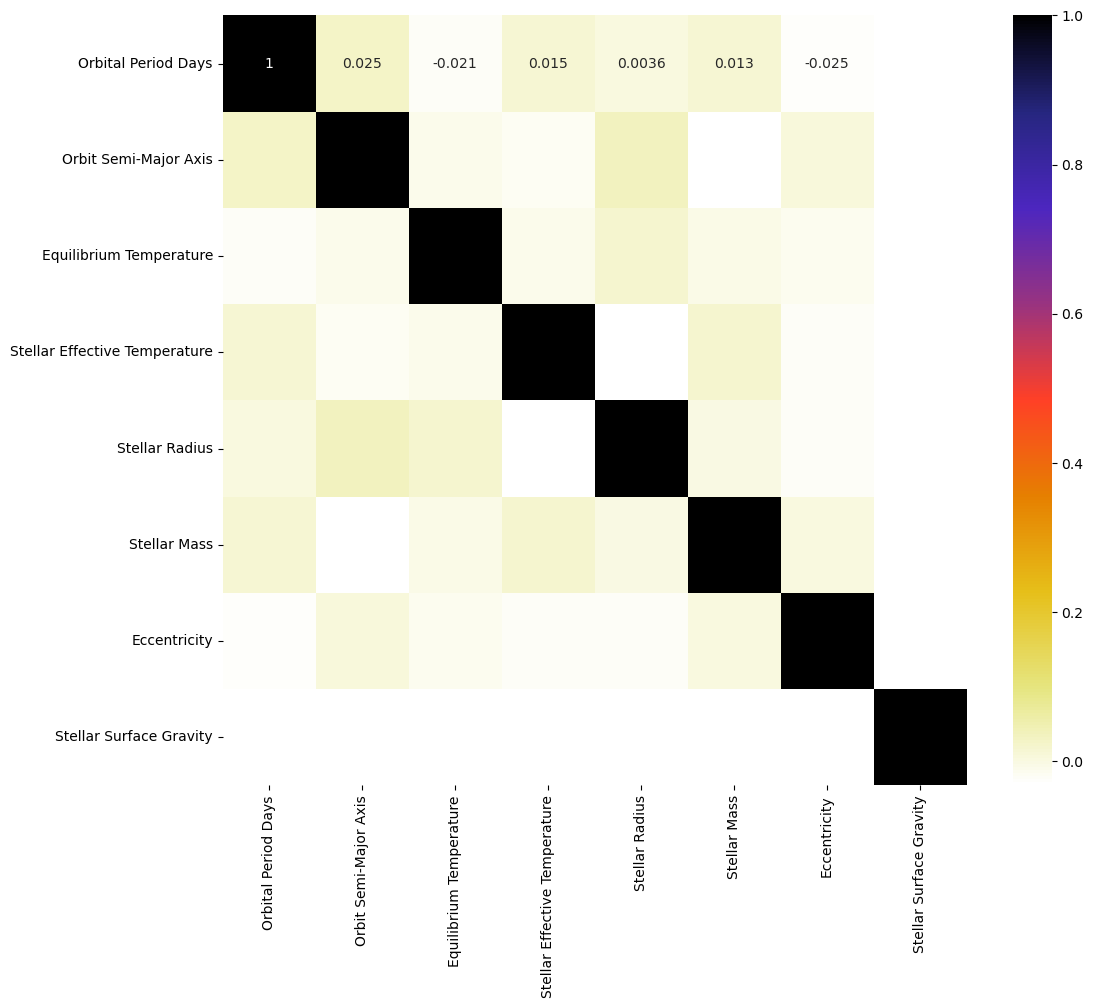

In [143]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [144]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [145]:
corr_features = correlation(X_train,0.1)
len(set(corr_features))

0

In [146]:
corr_features

set()

In [147]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, normalize

imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_imputed = imputer.fit_transform(X_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_test_imputed = imputer.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test_imputed)

#for Y data
# Y_imputed = imputer.fit_transform(Y_train)
# X_scaled = scaler.fit_transform(X_imputed)

# X_test_imputed = imputer.fit_transform(X_test)
# X_test_scaled = scaler.fit_transform(X_test_imputed)

Validation accuracy of KNN is 0.9994535519125683

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       906

    accuracy                           1.00      1830
   macro avg       1.00      1.00      1.00      1830
weighted avg       1.00      1.00      1.00      1830



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

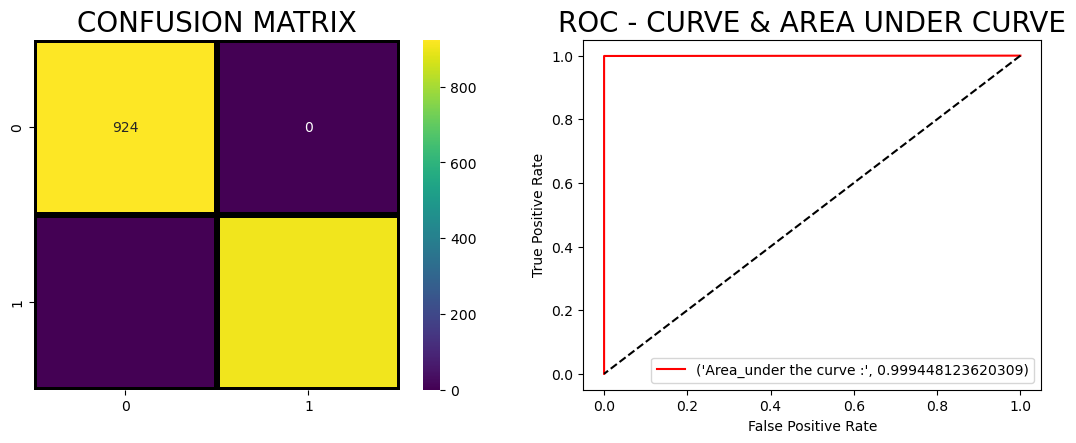

In [148]:
#K-NN
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(X_scaled,Y_train)
prediction=knn_model.predict(X_test_scaled)
print('Validation accuracy of KNN is', accuracy_score(prediction,Y_test))
print ("\nClassification report :\n",(classification_report(Y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.5049180327868853

Classification report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       924
           1       0.00      0.00      0.00       906

    accuracy                           0.50      1830
   macro avg       0.25      0.50      0.34      1830
weighted avg       0.25      0.50      0.34      1830



C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

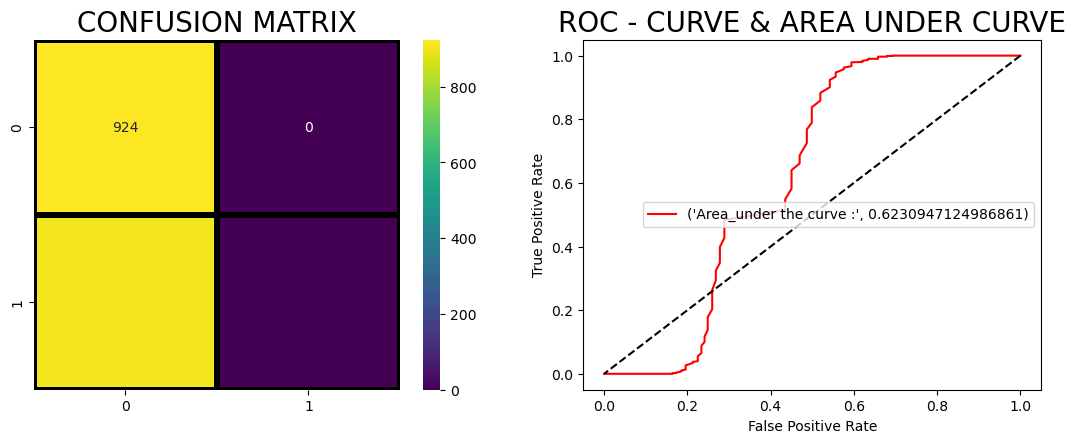

In [149]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(X_scaled,Y_train)

prediction=lr_model.predict(X_test_scaled)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,Y_test))
print ("\nClassification report :\n",(classification_report(Y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Decision Tree is 1.0

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       906

    accuracy                           1.00      1830
   macro avg       1.00      1.00      1.00      1830
weighted avg       1.00      1.00      1.00      1830



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

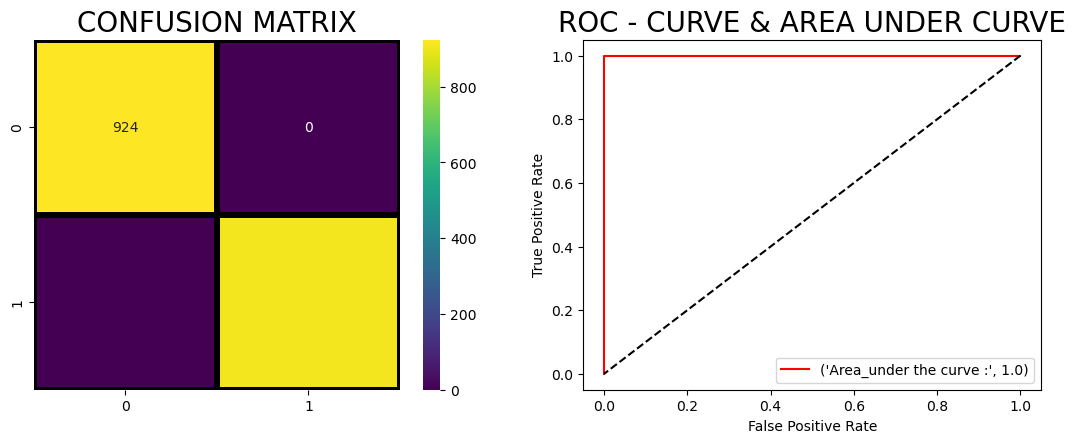

In [150]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(X_scaled,Y_train)

prediction=ds_model.predict(X_test_scaled)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,Y_test))
print ("\nClassification report :\n",(classification_report(Y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

<Axes: title={'center': 'Class Distribution'}, xlabel='Label', ylabel='Count'>

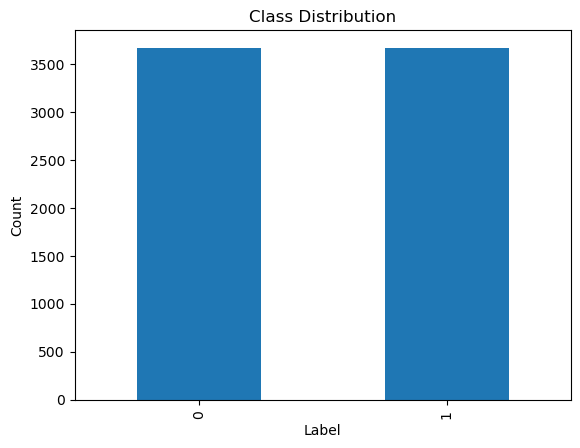

In [155]:
from imblearn.over_sampling import SMOTE


# Instantiate SimpleImputer to replace NaN with mean (you can choose other strategies too)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to your training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the training data only (X_train and Y_train)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_imputed, Y_train)

# Now, X_train_resampled and Y_train_resampled contain the resampled data

# Note: It's crucial to apply SMOTE only to the training data to avoid data leakage

# Optionally, you can also apply SMOTE to the testing data to balance it
X_test_resampled, Y_test_resampled = smote.fit_resample(X_test_imputed, Y_test)

# Count the occurrences of each class
class_counts = pd.Series(Y_train_resampled).value_counts()

# Plot the distribution of the target variable
class_counts.plot(kind='bar', xlabel='Label', ylabel='Count', title='Class Distribution')


# model = SMOTE()
# ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
# ov_train_y = ov_train_y.astype('int')

# ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

In [156]:
train_X, test_X, train_y, test_y = train_test_split(X_train_resampled, Y_train_resampled, test_size=0.33, random_state=42)

Validation accuracy of Decision Tree is 1.0

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2422
   macro avg       1.00      1.00      1.00      2422
weighted avg       1.00      1.00      1.00      2422



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

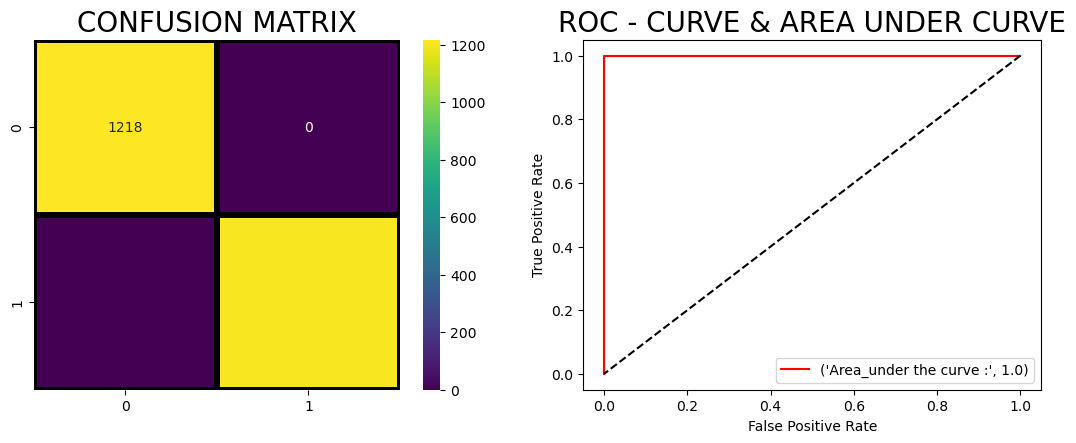

In [157]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X,train_y)

prediction=ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of KNN is 0.999587118084228

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2422
   macro avg       1.00      1.00      1.00      2422
weighted avg       1.00      1.00      1.00      2422



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

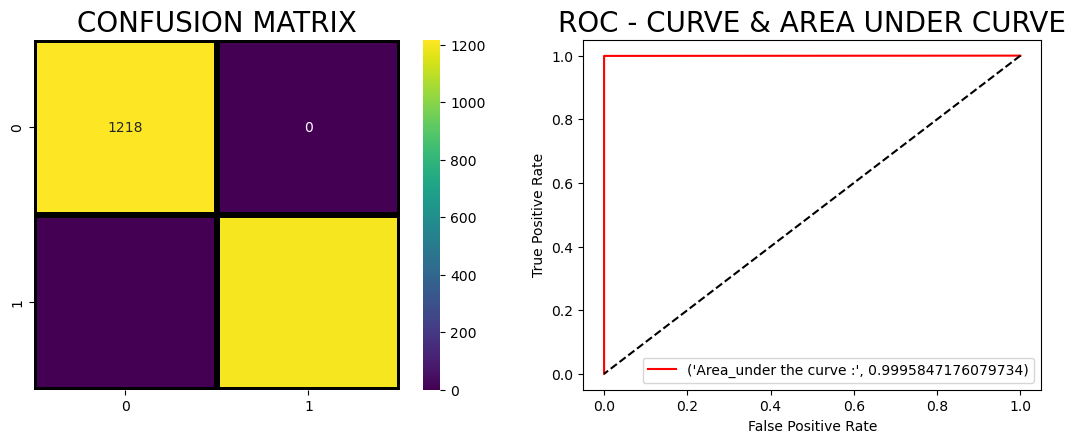

In [158]:
knn_model = KNeighborsClassifier()

knn_model.fit(train_X,train_y)

prediction=knn_model.predict(test_X)

print('Validation accuracy of KNN is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.5028901734104047

Classification report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1218
           1       0.00      0.00      0.00      1204

    accuracy                           0.50      2422
   macro avg       0.25      0.50      0.33      2422
weighted avg       0.25      0.50      0.34      2422



C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

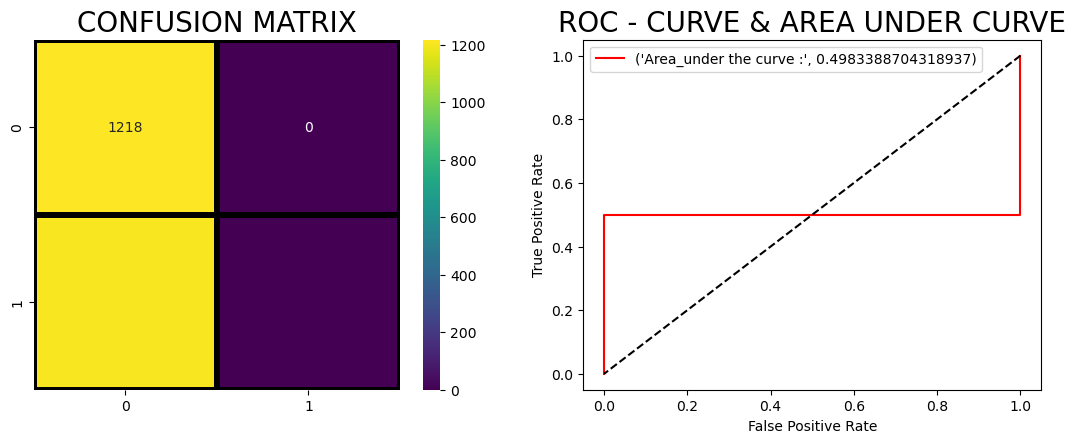

In [159]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(train_X,train_y)

prediction=lr_model.predict(test_X)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)